# Pandas cookbook

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exploring a DataFrame

In [4]:
df = pd.read_csv('data/volc_holocene.csv', header=0, delimiter=',', comment='#',
                 na_values='unknown', index_col='Number')

### Examining values

In [13]:
n = 3
df.head(n)    # Show the first n rows, default 5
df.tail(n)    # Show the last n rows, default 5

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.45,165.50,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.15,-57.75,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
1507,390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


In [16]:
df.values    # Convert to np.array

array([[210010, 'West Eifel Volcanic Field', 'Germany', ..., 600,
        'Foidite', 'Rift Zone / Continental Crust (>25 km)'],
       [210020, 'Chaine des Puys', 'France', ..., 1464,
        'Basalt / Picro-Basalt', 'Rift Zone / Continental Crust (>25 km)'],
       [210030, 'Olot Volcanic Field', 'Spain', ..., 893,
        'Trachybasalt / Tephrite Basanite',
        'Intraplate / Continental Crust (>25 km)'],
       ..., 
       [390812, 'Rittmann, Mount', 'Antarctica', ..., 2600, nan,
        'Intraplate / Continental Crust (>25 km)'],
       [390829, 'James Ross Island', 'Antarctica', ..., 1630,
        'Basalt / Picro-Basalt', 'Intraplate / Continental Crust (>25 km)'],
       [390847, 'Melville', 'Antarctica', ..., 549, nan,
        'Intraplate / Continental Crust (>25 km)']], dtype=object)

In [61]:
df.shape

(3, 11)

In [24]:
df.columns    # Get or set the column names

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [25]:
df.index    # Get or set the DataFrame's index

RangeIndex(start=0, stop=1508, step=1)

In [26]:
# Access a column
df['Name']            # As a Series
df[['Name']]          # As a DataFrame
df[['Name', 'Type']]  # Multiple columns!

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [32]:
# Access rows
df.loc[210010]               # By key. As a Series
df.loc[[210010]]             # As a DataFrame
df.loc[[210010, 390847]]     # Multiple rows

df.iloc[0]                   # By row index. As a Series
df.iloc[[0]]                 # As a DataFrame
df[slice(3,10,3)]               # Use a slice! Also df.iloc[slice(3,4)]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.73,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.73,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)


In [21]:
# Rows and columns!
df.loc[[210010, 390847], ['Name', 'Type']]
df.loc[[210010, 390847], :]                  # Slice to get all values!
df.iloc[:, ['Name', 'Type']]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


### Filtering

Select based on a criteria by creating a boolean array, then passing it as an index to the DataFrame

In [19]:
df = pd.DataFrame(np.random.randint(10, 100, (100, 3)), columns=['A', 'B', 'C'])
big_B = df.B > 90
df[big_B]         # Or all together as df[df.B > 90]

,A,B,C
28,36,98,11
45,33,95,67
47,77,95,35
55,11,99,99
61,92,95,92
64,22,96,62


Apply a function to a DataFrame or Series.

In [28]:
df.apply(type)

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
dtype: object

### Iteration

Iterate through the column names in the dataframe.

In [24]:
for column_name in df:
    if int(label) % 13 == 0:
        print(column_name)

Iterate through the rows, with the indices. The row comes as a Series.

In [17]:
for label, row in df.iterrows():
    print(label, row.iloc[0])

210010 West Eifel Volcanic Field
210020 Chaine des Puys
210030 Olot Volcanic Field


### Datetimes

You can have datetimes as columns, and as indices for special slicing. Use parse_dates=True in pd.read_csv() to infer dates from specific formats, along with the index_col parameter to choose the index. You can also pass a list of lists/tuples to parse_dates, where each list is the indices of the columns making up an individual datetime column for parsing.

In [126]:
# Here's an example using a custom
# This example comes out with something weird: The 'Year' column is kept instead of the 'Colour' column...
df = pd.read_excel('data/favorites.xlsx', sheetname='Colors', usecols=[0, 1, 2, 3, 4, 5, 6],
                   parse_dates={'Date': [1, 2, 3, 4, 5, 6]}, index_col='Date',
                   date_parser=lambda x: pd.datetime.strptime(x, "%Y %m %d %H %M %S")).sort_index()
print(df.index)
# Fix the issue with Year being the remaining value
df.columns = ['Colour']; df.Colour = ['Red', 'Green', 'Blue']
df.head()

DatetimeIndex(['2015-06-22 14:19:44', '2019-02-24 09:15:02',
               '2024-05-15 19:17:53'],
              dtype='datetime64[ns]', name='Date', freq=None)


,Colour
Date,
2015-06-22 14:19:44,Red
2019-02-24 09:15:02,Green
2024-05-15 19:17:53,Blue


Datetimes can also be made from strings with the pd.to_datetime() function.

You can access and slice datetime indices by date, or by part of the date.

In [129]:
df.loc['2015-06-22 14:19:44']

Colour    Red
Name: 2015-06-22 14:19:44, dtype: object

In [131]:
df.loc['2015-06-22 14:19:44':'2019-02-24 09:15:02']

,Colour
Date,
2015-06-22 14:19:44,Red
2019-02-24 09:15:02,Green


In [133]:
df.loc['2000-01-01':'2019-12-31']

,Colour
Date,
2015-06-22 14:19:44,Red
2019-02-24 09:15:02,Green


In [134]:
df.loc['2024']

,Colour
Date,
2024-05-15 19:17:53,Blue


### Analysis

In [14]:
df.info()    # Info on column types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
Number                 1508 non-null int64
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [15]:
df.describe()   # Basic statistics on column values 

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


In [39]:
df.count()    # The number of values in each column of a DataFrame, or in a Series

Name                   1508
Country                1508
Region                 1508
Type                   1508
Activity Evidence      1507
Last Known Eruption    1508
Latitude               1508
Longitude              1508
Elevation (Meters)     1508
Dominant Rock Type     1455
Tectonic Setting       1501
dtype: int64

In [50]:
df.Type.unique()       # Looking at the cases we have

array(['Maar(s)', 'Lava dome(s)', 'Pyroclastic cone(s)',
       'Explosion crater(s)', 'Caldera', 'Stratovolcano', 'Complex',
       'Submarine', 'Stratovolcano(es)', 'Shield', 'Shield(s)',
       'Caldera(s)', 'Lava dome', 'Lava cone(s)', 'Volcanic field',
       'Volcanic field(s)', 'Fissure vent(s)', 'Fissure vent',
       'Pyroclastic cone', 'Tuff cone(s)', 'Tuff cone',
       'Pyroclastic shield', 'Submarine(es)', 'Maar', 'Compound',
       'Lava cone', 'Unknown', 'Stratovolcano?', 'Crater rows',
       'Complex(es)', 'Cone(s)', 'Tuff ring(s)', 'Subglacial'], dtype=object)

Numeric analysis methods

In [34]:
for method in ('mean', 'std', 'median', 'min', 'max'):
    print(method.capitalize(), getattr(df['Elevation (Meters)'], method)(), sep=':\t')

Mean:	1683.3574270557028
Std:	1571.1028849022337
Median:	1464.0
Min:	-4200
Max:	6879


In [37]:
# Quantiles: like medians at different percentages
df['Elevation (Meters)'].quantile([0.25, 0.5, 0.75])

0.25     687.25
0.50    1464.00
0.75    2352.25
Name: Elevation (Meters), dtype: float64

## Cleaning
### Exploratory Data Analysis

In [7]:
# Reload this guy
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')
# Check missing values and surprising data types. Strings appear as 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


In [75]:
# Check the frequency of values
df.Region.value_counts(dropna=False)

South America                     197
Indonesia                         142
Japan, Taiwan, Marianas           141
Kamchatka and Mainland Asia       132
Africa and Red Sea                131
México and Central America        120
Alaska                             88
Melanesia and Australia            80
Canada and Western USA             71
Philippines and SE Asia            62
New Zealand to Fiji                60
Middle East and Indian Ocean       46
Kuril Islands                      46
Mediterranean and Western Asia     44
Antarctica                         34
Iceland and Arctic Ocean           34
Hawaii and Pacific Ocean           33
Atlantic Ocean                     30
West Indies                        17
Name: Region, dtype: int64

#### With graphs

[]

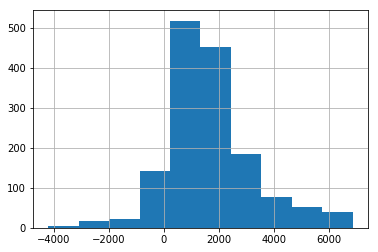

In [74]:
df['Elevation (Meters)'].hist() # Optional parameters include logx, logy (booleans)
                                # rot (degrees to rotate x label)
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[]

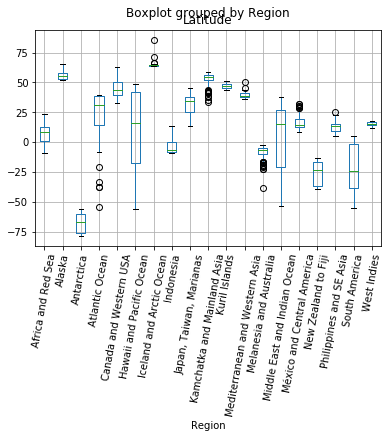

In [77]:
# Another slightly nonsensical plot...
df.boxplot(column='Latitude', by='Region', rot=80)
plt.plot()

### Tidy Data

Named for Hadley Wickham's paper (https://vita.had.co.nz/papers/tidy-data.pdf), the idea that columns represent observed variables, rows represent individual observations, and observational units are grouped in tables. That means separate columns that each represent different cases of a variable can be 'melted' into a single column.

In [3]:
# Me again
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')

The melted version is better for analysis

In [4]:
melted = df.melt(id_vars=['Name', 'Country', 'Region'],    # Identify columns to leave as columns on each row
                                                           # The entries for each of the other columns in each row will be
                                                           #   made rows, with a column for the old column name and a column
                                                           #   for that entry's value
                 var_name='Datum',
                 value_name='Value')
melted.head()

,Name,Country,Region,Datum,Value
0,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Type,Maar(s)
1,Chaine des Puys,France,Mediterranean and Western Asia,Type,Lava dome(s)
2,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Type,Pyroclastic cone(s)
3,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Type,Pyroclastic cone(s)
4,Larderello,Italy,Mediterranean and Western Asia,Type,Explosion crater(s)


The pivoted form is better for reporting

In [5]:
pivoted = melted.pivot_table(index=['Name', 'Country', 'Region'],     # Which columns don't get unstacked
                             columns='Datum',                         # Which column does get unstacked
                             values='Value',                          # Which of the other columns is used to fill in the values
                             aggfunc='first')                         # How to resolve multiple entries for an index entry
                                                                      # This one works with string data.
pivoted.head()

,,Datum,Activity Evidence,Dominant Rock Type,Elevation (Meters),Last Known Eruption,Latitude,Longitude,Tectonic Setting,Type
Name,Country,Region,,,,,,,,
Abu,Japan,"Japan, Taiwan, Marianas",Eruption Dated,Andesite / Basaltic Andesite,641,6850 BCE,34.5,131.6,Subduction Zone / Continental Crust (>25 km),Shield(s)
Acamarachi,Chile,South America,Evidence Credible,Dacite,6046,Unknown,-23.3,-67.62,Subduction Zone / Continental Crust (>25 km),Stratovolcano
Acatenango,Guatemala,México and Central America,Eruption Observed,Andesite / Basaltic Andesite,3976,1972 CE,14.501,-90.876,Subduction Zone / Continental Crust (>25 km),Stratovolcano(es)
Acigol-Nevsehir,Turkey,Mediterranean and Western Asia,Eruption Dated,Rhyolite,1683,2080 BCE,38.537,34.621,Intraplate / Continental Crust (>25 km),Caldera
Adagdak,United States,Alaska,Unrest / Pleistocene,NaN,610,Unknown,51.988,-176.592,Subduction Zone / Intermediate Crust (15-25 km),Stratovolcano


Pivoting with multiple indices causes a multi-level index. If you'd rather have a straight numeric index, you can use df.reset_index(), then maybe df.set_index()

In [16]:
print(pivoted.index)
df = pivoted.reset_index().set_index('Name')
print('\nbecomes\n', df.index, sep='\n')

MultiIndex(levels=[['Abu', 'Acamarachi', 'Acatenango', 'Acigol-Nevsehir', 'Adagdak', 'Adams', 'Adams Seamount', 'Adatarayama', 'Adwa', 'Afdera', 'Agrigan', 'Agua', 'Agua de Pau', 'Aguajito, El', 'Aguilera', 'Agung', 'Ahyi', 'Aira', 'Akademia Nauk', 'Akagisan', 'Akan', 'Akandanayama', 'Akhtang', 'Akita-Komagatake', 'Akita-Yakeyama', 'Akuseki-jima', 'Akutan', 'Alaid', 'Alamagan', 'Alayta', 'Alcedo', 'Ale Bagu', 'Alid', 'Aliso', 'Alligator Lake', 'Almolonga', 'Alney-Chashakondzha', 'Alngey', 'Alu-Dalafilla', 'Alutu', 'Amak', 'Amasing', 'Ambalatungan Group', 'Ambang', 'Ambitle', 'Ambre-Bobaomby', 'Ambrym', 'Amiata', 'Amorong', 'Amsterdam Island', 'Amukta', 'Anatahan', 'Anaun', 'Andahua-Orcopampa', 'Andrus', 'Aneityum', 'Aniakchak', 'Ankaizina Field', 'Ankaratra Field', 'Antillanca Group', 'Antisana', 'Antofagasta Volcanic Field', 'Antuco', 'Aoba', 'Aogashima', 'Apagado', 'Apaneca Range', 'Apastepeque Field', 'Apo', 'Apoyeque', 'Aracar', 'Aragats', 'Aramuaca, Laguna', 'Ararat', 'Arayat', 'A

To access strings stored in the data, use the str method on the column. To index lists stored in column values, use .str.get(index). Each returns a series, but you can chain them together.

In [33]:
tectonic_info = df['Tectonic Setting'].str.split('(', 1)
df['Tectonic Zone'] = tectonic_info.str.get(0)
df['Tectonic Range'] = tectonic_info.str.get(1).str.rstrip(')')
df.tail(3)

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Tectonic Zone,Tectonic Range
Number,,,,,,,,,,,,,
390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.45,165.50,2600,NaN,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km
390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.15,-57.75,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km),Intraplate / Continental Crust,>25 km


### Concatenating Data

Combining dataframes, maybe a large dataset split into multiple files.

In [58]:
# Let's split our dataframe as an example
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')
half_row = len(df) // 2
set1, set2 = df.iloc[:half_row], df.iloc[half_row:]

# And column-wise
half_col = len(df.columns) // 2
setA, setB = df.iloc[:,:half_col], df.iloc[:,half_col:]

In [48]:
# Combine two sets of rows. This is axis 0
df_concat = pd.concat([set1, set2],
                      ignore_index=False)       # Discard the indices and use a range
                                                # This can avoid duplicate indices
df.equals(df_concat)

True

In [49]:
# Combine two frames of columns
df_concat = pd.concat([setA, setB], axis=1)
df.equals(df_concat)

True

You can merge dataframes like in SQL based on a key column. This will work for 1-1, 1-N, and N-M merges:
* 1-1: Each row will be combined into a single row with the row with the same key from the other dataframe
* 1-N: Each of the N rows with a key will get the columns from the 1 row with that key
* N-M: Every combination of rows with the same key, one from each dataframe, will be included in the result (this is really the same as what happens with the other two)

In [60]:
# Lets take our split dataframes and give them a common key
setC = setB.copy()
setC.insert(0, 'Volcano', setA['Name'])          # Insert the column at the front of the frame!
setC['Volcano'].equals(setA['Name'])

True

In [75]:
merged = pd.merge(left=setA, right=setC,               # Which dataframes to merge
                  # on=None,                           # If the key columns had the same name, we could put it in 'on'
                  left_on='Name', right_on='Volcano')  # Which columns to use as the keys
# Turns out this was a 1-N! Or N-M?
merged.Name.value_counts().head()

Unnamed         529
Santa Isabel      4
Sumbing           4
Santo Tomas       4
Flores            4
Name: Name, dtype: int64

### Data Types

Check the types of the columns with DataFrame.info(). Columns of type 'object' are represented by strings.

In [43]:
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


For columns with only a small set of values, you can convert the column type to a 'category', reducing memory used.

In [49]:
import sys
print('Values:')
print(df['Activity Evidence'].unique())    # Check how many options there are with unique()
df['Evidence Category'] = df['Activity Evidence'].astype('category')
print('\nSize before conversion to a category:')
print(sys.getsizeof(df['Activity Evidence']), '>', sys.getsizeof(df['Evidence Category']))

Values:
['Eruption Dated' 'Evidence Credible' 'Eruption Observed'
 'Evidence Uncertain' 'Unrest / Pleistocene' 'Unrest / Holocene' nan]

Size before conversion to a category:
123063 > 14201


Convert columns to numeric types with pd.to_numeric(). Using errors='coerce' substitutes NaN, while 'ignore' halts and returns the original, and the default 'raise' raises an exception.

In [22]:
# These are already numbers, so let's show off a parameter
# This should be equivalent to the original column, but stored in smaller space.
downcast_column = pd.to_numeric(df.Latitude, downcast='float')
print(downcast_column.dtype)
print(sys.getsizeof(df.Latitude), '>', sys.getsizeof(downcast_column))

float32
65112 > 59080


### Applying functions

Use the apply function! The first argument is the function. Positional arguments to the function can be passed in a sequence to the args parameter of apply, and any unrecognized keyword arguments to apply will be passed as keyword arguemnts to the function.

In [41]:
import re
s_parens_pattern = r'\(e?s\)'
def singularize(string, plural_pattern):
    """Remove an optional 's' from the input string."""
    return re.split(plural_pattern, string)[0]

df.Type = df.Type.apply(singularize, args=(s_parens_pattern,))
df.head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater,Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km)


The default axis, 0 means applying to each column in order. Passing axis=1 means applying to each row in order. (Maybe remember which index of df.iloc[:,:] is the one being incremented each iteration)

In [81]:
def calculate_age(volcano):
    """Return the age of a volcano givin its birthyear.
    
    Expect CE or BCE specifier. Return -1 if the input is not a year.
    """
    year = volcano['Last Known Eruption']
    try:
        year, epoch = year.split()
        year = int(year)
    except ValueError:     # There weren't two values
        # Try to treat the value as just a year (CE)
        try:
            year = int(year)
        except ValueError:
            return -1
    else:
        if epoch == 'BCE':
            year *= -1
    
    return 2018 - year

df['Age'] = df.apply(calculate_age, axis=1).astype(int)
df.head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting,Age
Number,,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar,Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km),10318
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome,Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km),6058
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km),-1
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone,Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km),5618
211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater,Eruption Observed,1282 CE,43.250,10.87,500,No Data,Subduction Zone / Continental Crust (>25 km),736


### Handling Data

You can drop duplicates! This is useful for reducing a DataFrame after taking a subset of the columns.

In [141]:
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')
countries = df[['Country', 'Region']]
countries = countries.drop_duplicates()
countries.head()

,Country,Region
Number,,
210010,Germany,Mediterranean and Western Asia
210020,France,Mediterranean and Western Asia
210030,Spain,Mediterranean and Western Asia
211001,Italy,Mediterranean and Western Asia
212020,Greece,Mediterranean and Western Asia


You can fill in nan values, on a whole or partial DataFrame or on a Series. The .fillna() method substitutes a value, perhaps the mean or median of a numerical column. The .dropna() method removes rows with a NaN value in them (or columns: axis=1).

In [4]:
# df.info() shows the only missing values are under 'Activity Evidence' (1), 'Tectonic Setting' (7),
#   and 'Dominant Rock Type' (53). The original df has 1508 entries.
no_nulls = df.dropna()
no_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 210010 to 390829
Data columns (total 11 columns):
Name                   1455 non-null object
Country                1455 non-null object
Region                 1455 non-null object
Type                   1455 non-null object
Activity Evidence      1455 non-null object
Last Known Eruption    1455 non-null object
Latitude               1455 non-null float64
Longitude              1455 non-null float64
Elevation (Meters)     1455 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1455 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 136.4+ KB


In [5]:
filled = df.copy()
filled['Dominant Rock Type'] = df['Dominant Rock Type'].fillna('No Data')
filled['Tectonic Setting'] = df['Tectonic Setting'].fillna('Unknown')
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1508 non-null object
Tectonic Setting       1508 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


Get a boolean array of the missing values with the .notnull() or .isnull() methods. This can be used to check if there are any null values by chaining with .all() or .any() (for a Series, or chaining it twice for a DataFrame).

In [6]:
print('No nulls in no_nulls: ', no_nulls.notnull().all().all())
print(filled.isnull().any())

No nulls in no_nulls:  True
Name                   False
Country                False
Region                 False
Type                   False
Activity Evidence       True
Last Known Eruption    False
Latitude               False
Longitude              False
Elevation (Meters)     False
Dominant Rock Type     False
Tectonic Setting       False
dtype: bool


## Merging DataFrames

You can change the index of a DataFrame! This might help allign data to combine the DataFrames. 

In [142]:
df.reindex(reversed(df.index)).head()              # Isn't this cute?

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.020,-57.670,549,NaN,Intraplate / Continental Crust (>25 km)
390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)


In [143]:
# Missing values will be filled in. Strip them with .dropna().
df.reindex(range(210000, 210060, 10)).head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600.0,Foidite,Rift Zone / Continental Crust (>25 km)
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464.0,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893.0,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117.0,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [146]:
# ...or fill in the missing values. Methods are 'ffill' or 'pad', 'bfill' or 'backfill', and 'nearest'.
df.reindex(range(210000, 210060, 10), method='nearest').head()

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210000,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.97,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.53,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.02,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


#### Arithmetic

You can do simple arithmetic with the builtin operators. But for applying operations to multiple columns, to change the axis, or to use special extra arguments (like the fill_value=0 parameter to .add()) you can use and chain arithmetic methods.

In [81]:
# What percentage of the way around the earth are you?
percent_coords = pd.concat([df.Latitude.add(90).divide(180), df.Longitude.add(180).divide(360)], axis=1)
percent_coords.multiply(100).head()

,Latitude,Longitude
Number,,
210010,77.872222,51.902778
210020,75.430556,50.825000
210030,73.427778,50.702778
210040,71.594444,48.883333
211001,74.027778,53.019444


The .pct_change() method gives the amount of change from the last row (NaN for the first row)`

In [85]:
# Access a column
df['Name']            # As a Series
df[['Name']]          # As a DataFrame
df[['Name', 'Type']]  # Multiple columns!

,Latitude,Longitude
Number,,
210010,NaN,NaN
210020,-0.031355,-0.020765
210030,-0.026551,-0.002405
210040,-0.024968,-0.035885
211001,0.033988,0.084612


In [32]:
# Access rows
df.loc[210010]               # By key. As a Series
df.loc[[210010]]             # As a DataFrame
df.loc[[210010, 390847]]     # Multiple rows

df.iloc[0]                   # By row index. As a Series
df.iloc[[0]]                 # As a DataFrame
df[slice(3,10,3)]               # Use a slice! Also df.iloc[slice(3,4)]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.87,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
211004,Colli Alban,Italy,Mediterranean and Western Asia,Caldera,Evidence Uncertain,Unknown,41.73,12.700,949,Foidite,Subduction Zone / Continental Crust (>25 km)
211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302 CE,40.73,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)


In [21]:
# Rows and columns!
df.loc[[210010, 390847], ['Name', 'Type']]
df.loc[[210010, 390847], :]                  # Slice to get all values!
df.iloc[:, ['Name', 'Type']]

,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
Number,,,,,,,,,,,
210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.17,6.85,600,Foidite,Rift Zone / Continental Crust (>25 km)
390847,Melville,Antarctica,Antarctica,Stratovolcano,Evidence Uncertain,Unknown,-62.02,-57.67,549,NaN,Intraplate / Continental Crust (>25 km)


### Filtering

Select based on a criteria by creating a boolean array, then passing it as an index to the DataFrame

In [19]:
df = pd.DataFrame(np.random.randint(10, 100, (100, 3)), columns=['A', 'B', 'C'])
big_B = df.B > 90
df[big_B]         # Or all together as df[df.B > 90]

,A,B,C
73,13,94,51
74,13,97,55
82,83,98,59
84,95,99,62
94,27,95,14


Apply a function to a DataFrame or Series.

In [28]:
df.apply(type)

A    <class 'pandas.core.series.Series'>
B    <class 'pandas.core.series.Series'>
C    <class 'pandas.core.series.Series'>
dtype: object

### Iteration

Iterate through the column names in the dataframe.

In [24]:
for column_name in df:
    if int(label) % 13 == 0:
        print(column_name)

Iterate through the rows, with the indices. The row comes as a Series.

In [23]:
for label, row in df.iterrows():
    print(label, row.iloc[0])

0 23
1 86
2 45
3 50
4 56
5 14
6 10
7 47
8 32
9 56
10 70
11 20
12 38
13 38
14 79
15 74
16 79
17 68
18 91
19 40
20 96
21 23
22 23
23 80
24 76
25 50
26 69
27 16
28 55
29 39
30 41
31 69
32 84
33 72
34 69
35 14
36 15
37 63
38 83
39 60
40 94
41 48
42 69
43 10
44 78
45 86
46 50
47 30
48 19
49 19
50 74
51 96
52 20
53 24
54 19
55 74
56 80
57 59
58 61
59 85
60 99
61 59
62 81
63 13
64 52
65 87
66 69
67 57
68 33
69 37
70 72
71 48
72 18
73 13
74 13
75 32
76 39
77 21
78 55
79 35
80 67
81 47
82 83
83 46
84 95
85 73
86 99
87 95
88 17
89 57
90 92
91 32
92 48
93 43
94 27
95 40
96 50
97 96
98 58
99 18


### Analysis

In [14]:
df.info()    # Info on column types and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1508 entries, 0 to 1507
Data columns (total 12 columns):
Number                 1508 non-null int64
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 141.5+ KB


In [15]:
df.describe()   # Basic statistics on column values 

,Number,Latitude,Longitude,Elevation (Meters)
count,1508.000000,1508.000000,1508.000000,1508.000000
mean,296656.110743,14.083156,23.391469,1683.357427
std,48861.852600,31.871107,113.656588,1571.102885
min,210010.000000,-78.500000,-179.970000,-4200.000000
25%,261157.500000,-7.068750,-78.274250,687.250000
50%,300015.000000,13.861500,38.390000,1464.000000
75%,342123.250000,41.748750,138.578000,2352.250000
max,390847.000000,85.608000,179.580000,6879.000000


## Cleaning
### Exploratory Data Analysis

In [64]:
# Reload this guy
df = pd.read_csv('data/volc_holocene.csv', header=0, index_col='Number')
# Check missing values and surprising data types. Strings appear as 'object'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1508 entries, 210010 to 390847
Data columns (total 11 columns):
Name                   1508 non-null object
Country                1508 non-null object
Region                 1508 non-null object
Type                   1508 non-null object
Activity Evidence      1507 non-null object
Last Known Eruption    1508 non-null object
Latitude               1508 non-null float64
Longitude              1508 non-null float64
Elevation (Meters)     1508 non-null int64
Dominant Rock Type     1455 non-null object
Tectonic Setting       1501 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 141.4+ KB


In [75]:
# Check the frequency of values
df.Region.value_counts(dropna=False)

South America                     197
Indonesia                         142
Japan, Taiwan, Marianas           141
Kamchatka and Mainland Asia       132
Africa and Red Sea                131
México and Central America        120
Alaska                             88
Melanesia and Australia            80
Canada and Western USA             71
Philippines and SE Asia            62
New Zealand to Fiji                60
Middle East and Indian Ocean       46
Kuril Islands                      46
Mediterranean and Western Asia     44
Antarctica                         34
Iceland and Arctic Ocean           34
Hawaii and Pacific Ocean           33
Atlantic Ocean                     30
West Indies                        17
Name: Region, dtype: int64

#### With graphs

[]

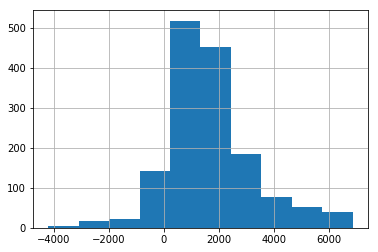

In [74]:
df['Elevation (Meters)'].hist() # Optional parameters include logx, logy (booleans)
                                # rot (degrees to rotate x label)
plt.plot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[]

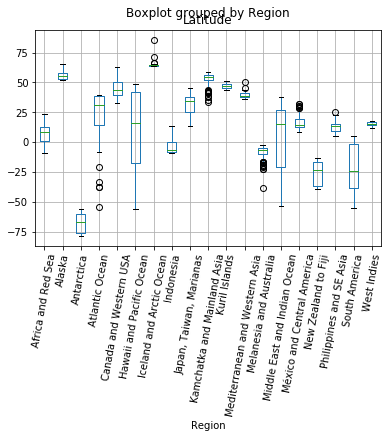

In [77]:
# Another slightly nonsensical plot...
df.boxplot(column='Latitude', by='Region', rot=80)
plt.plot()